<a href="https://colab.research.google.com/github/annanasnas/digital_signal_processing/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Самостоятельная работа №2**

Выполнили: 

Сюракшина Анастасия БИБ191, 
Холодов Даниил БИБ191

# Реализация тонального набора

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [110]:
f1_case = {
    0: 941,
    1: 697,
    2: 697,
    3: 697,
    4: 770,
    5: 770,
    6: 770,
    7: 852,
    8: 852,
    9: 852
}
f2_case = {
    0: 1336,
    1: 1209,
    2: 1336,
    3: 1477,
    4: 1209,
    5: 1336,
    6: 1477,
    7: 1209,
    8: 1336,
    9: 1477
}

In [153]:
n = int(input('Введите число от 0 до 9: '))
f1 = f1_case[n]
f2 = f2_case[n]

Введите число от 0 до 9: 2


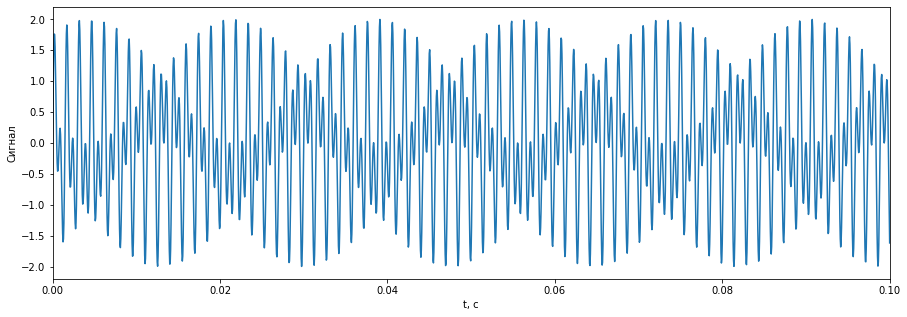

In [182]:
fs=10000 # частота дискретизации
t = np.linspace(0, 0.5, fs)
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,5))
plt.plot(t, signal)
plt.xlabel('t, с')
plt.ylabel('Сигнал')
plt.xlim(0, 0.1)
plt.show()

In [155]:
display.Audio(signal, rate=fs)

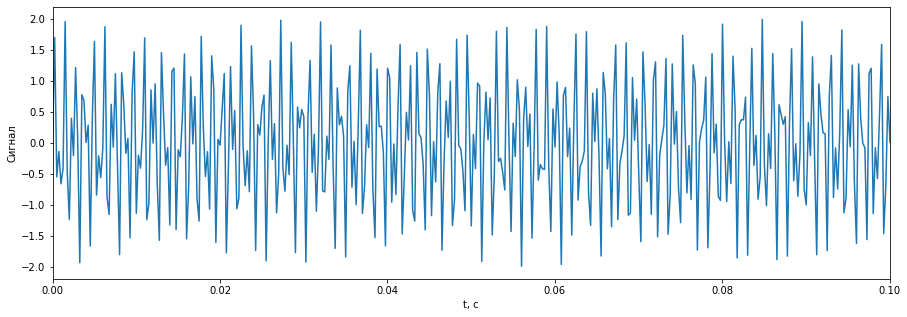

In [114]:
# опустим частоту до 2 кГц

fs=2000 # частота дискретизации
t = np.linspace(0, 0.5, fs)

plt.figure(figsize=(15,5))
plt.plot(t, signal)
plt.xlabel('t, с')
plt.ylabel('Сигнал')
plt.xlim(0, 0.1)
plt.show()

In [115]:
display.Audio(signal, rate=10000)

Искажение сигнала произошло в результате алиасинга

# Алгоритм Гёрцеля

In [157]:
!pip install git+https://github.com/NaleRaphael/goertzel-fft.git

  Cloning https://github.com/NaleRaphael/goertzel-fft.git to /tmp/pip-req-build-2xx8xn0i
  Running command git clone -q https://github.com/NaleRaphael/goertzel-fft.git /tmp/pip-req-build-2xx8xn0i
  Created wheel for gofft: filename=gofft-1.0.0-cp37-cp37m-linux_x86_64.whl size=36656 sha256=47b1c38c7c6eaa8be2e472105912ab315ef5ff543d7cf0ab540fde9d24c53b9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-h9pbd2lz/wheels/1a/a5/b9/7e11224e54f7429eae9a54b9e0f8970a40f850467a9a472b02
Successfully built gofft


In [199]:
import numpy as np
import gofft

fs = 10000   # sampling frequency
# ft = 60     # target frequency to be evaluated (60 Hz)
# dur = 2     # duration of signal
# num = fs*dur  # sampling points
# t = np.linspace(0, dur, num)  # time series
# data = np.sin(2*np.pi*ft*t)   # signal to be evaluated (60 Hz)
f = np.array([697, 770, 852, 941, 1209, 1336, 1477])

mag = gofft.alg.goertzel(signal, fs, 60, fs)
print(mag)  # 0.4969141358692001

0.0009373947646806922


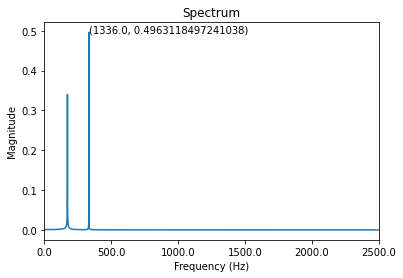

In [200]:
from scipy.fftpack import fft as scipyfft

spectrum = np.abs(scipyfft(signal)) / signal.size
l_half = spectrum.size // 2

# find max frequency in spectrum
idx_max = np.argmax(spectrum)

fig, ax = plt.subplots()
plt.plot(spectrum[:l_half])

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: x/2))
ax.set_xlim(0, l_half)
ax.set_title('Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

ax.annotate(
    '({}, {})'.format(idx_max/fs*2*fs, spectrum[idx_max]),
    (idx_max, spectrum[idx_max])
)

plt.show()

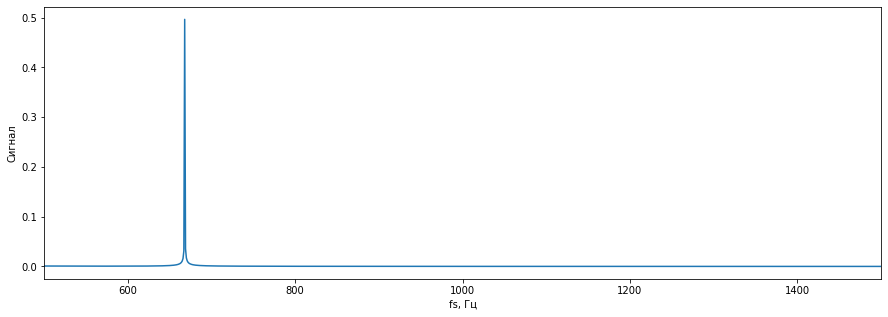

In [193]:
plt.figure(figsize=(15,5))
plt.plot(f, spectrum)
plt.xlabel('fs, Гц')
plt.ylabel('Сигнал')
plt.xlim(500, 1500)
plt.show()

In [204]:
idx_max

668